In [60]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [61]:
import pandas as pd
pd.options.display.max_rows = 3000
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 텍스트 전처리
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from konlpy.tag import Okt 
import MeCab
mecab = MeCab.Tagger()
import re 
from string import punctuation
import requests
import pickle
import ast

# 토픽모델링
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
import pyLDAvis 
import pyLDAvis.gensim

#### 미리 만들어둔 리뷰데이터 불러오기

In [62]:
df = pd.read_csv("D:/review.csv")

In [63]:
df

,DATE,STAR,REVIEW,LIKE
0,2019-12-27,5,부산에도 기다리던 지역화폐가 나왔네요 앱도 깔끔하고 카드도 바로 신청하고 잘 사용하...,8
1,2019-12-27,5,화이팅,4
2,2019-12-28,5,기다렸었는데 앞으로 잘 쓸게요^^,4
3,2019-12-28,5,동백전으로 여기저기 많이 사용해 볼게요. 부산 경제에도 많은 도움이 되면 좋겠습니다.,4
4,2019-12-28,5,부산 동백전 쓰기 편하게 잘 만들어졌네요 부산에서 혜택이 많았겠네요,5
5,2019-12-28,5,잘 사용해 볼게요. 동백전으로 혜택 많이 받으면 좋겠습니다.,4
6,2019-12-28,5,가자 글로벌 테스트베드 부산!,3
7,2019-12-29,5,오~ 부산도 드디어 모바일 지역화폐가 나왔네요!~ 앱설치하고 카드신청도 해봤는데요 ...,53
8,2019-12-30,5,드디어 기다리던 동백전앱이 출시됐네요 앞으로 이용 많이 하겠습니다,2
9,2019-12-30,4,군더더기 없는 ui가 마음에 드는군요. 많은 사업장에서 사용가능하면 더 좋겠습니다.,1


In [64]:
df.shape

(2871, 4)

#### corpus (말뭉치) 생성

In [65]:
corpus = df['REVIEW']
corpus

0       부산에도 기다리던 지역화폐가 나왔네요 앱도 깔끔하고 카드도 바로 신청하고 잘 사용하...
1                                                     화이팅
2                                      기다렸었는데 앞으로 잘 쓸게요^^
3         동백전으로 여기저기 많이 사용해 볼게요. 부산 경제에도 많은 도움이 되면 좋겠습니다.
4                   부산 동백전 쓰기 편하게 잘 만들어졌네요 부산에서 혜택이 많았겠네요
5                       잘 사용해 볼게요. 동백전으로 혜택 많이 받으면 좋겠습니다.
6                                        가자 글로벌 테스트베드 부산!
7       오~ 부산도 드디어 모바일 지역화폐가 나왔네요!~ 앱설치하고 카드신청도 해봤는데요 ...
8                    드디어 기다리던 동백전앱이 출시됐네요 앞으로 이용 많이 하겠습니다
9          군더더기 없는 ui가 마음에 드는군요. 많은 사업장에서 사용가능하면 더 좋겠습니다.
10                                                    좋아요
11      선택약정선택하면 네트워크장애라고 뜨면서 진행되지 않음...부산시에서 개인정보를 팔아...
12                            많은 이용 바랍니다 부산시민과 함께 성장해 갑시다
13      부산을 대표하는 꽃 이름으로 지은 동백전. 이름이 멋지네요. 부산에서 이용하는 혜택...
14                                           편의점에서도 사용되나요
15                                        설치가 아주 간단하고 쉽네요
16                              군더더기 없이 사용하기 편하고 좋습니다. ^^
17            

#### tf-idf 활용한 빈도분석

In [66]:
total_tokens = [token for mag in corpus for token in str(mag).split()]

print('띄어쓰기 기준으로 나누어봤을 때의 단어(토큰)의 개수:', len(total_tokens), '개')

띄어쓰기 기준으로 나누어봤을 때의 단어(토큰)의 개수: 33050 개


In [67]:
total_tokens[:10]

['부산에도', '기다리던', '지역화폐가', '나왔네요', '앱도', '깔끔하고', '카드도', '바로', '신청하고', '잘']

In [68]:
tfidf = TfidfVectorizer(max_features=1000)
tdm = tfidf.fit_transform(corpus)
word_count = pd.DataFrame({'단어': tfidf.get_feature_names(), 
                           '빈도': tdm.sum(axis=0).flat})
word_count.sort_values('빈도', ascending=False).head(20)
                          

,단어,빈도
806,좋아요,224.191436
158,너무,63.117580
200,동백전,62.978886
869,카드,46.494622
829,진짜,37.231087
86,계속,35.787430
804,좋습니다,33.267327
884,캐시백,31.875934
585,앱이,31.704516
178,다시,28.102289


#### 텍스트 전처리
- 자음모음만으로 구성된 것 제거
- 특수문자 제거
- 숫자 제거

In [69]:
def message_cleaning(docs):

  
   
    # Series의 object를 str로 변경.
    docs = [str(doc) for doc in docs]
    
    
    # 1. 자음 모음 제거하기
    pattern1 = re.compile("[ㄱ-ㅎ]*[ㅏ-ㅢ]*")
    docs = [pattern1.sub("", doc) for doc in docs]
    # 2. 특수문자 제거
    pattern2 = re.compile("[\{\}\[\]\/?.,;:'|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern2.sub("", doc) for doc in docs]
    # 3. 숫자 제거
    pattern3 = re.compile('\d+')
    docs = [pattern3.sub("", doc) for doc in docs]
    
    return docs


<>:13: DeprecationWarning: invalid escape sequence \{
<>:16: DeprecationWarning: invalid escape sequence \d
<>:13: DeprecationWarning: invalid escape sequence \{
<>:16: DeprecationWarning: invalid escape sequence \d
<>:13: DeprecationWarning: invalid escape sequence \{
<>:16: DeprecationWarning: invalid escape sequence \d
<ipython-input-69-5090dc8cd3d9>:13: DeprecationWarning: invalid escape sequence \{
  pattern2 = re.compile("[\{\}\[\]\/?.,;:'|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
<ipython-input-69-5090dc8cd3d9>:16: DeprecationWarning: invalid escape sequence \d
  pattern3 = re.compile('\d+')


#### 명사추출

In [70]:
import re
import MeCab # 형태소 분석기
mecab = MeCab.Tagger()
import requests
import pickle
import ast
## mecab형태소 분석기로 명사 추출하는 함수
def mecab_nouns(text): 
    nouns = []
    
    # 우리가 원하는 TOKEN\tPOS의 형태를 추출하는 정규표현식.
    pattern = re.compile(".*\t[A-Z]+")
    
    # 패턴에 맞는 문자열을 추출하여 konlpy의 mecab 결과와 같아지도록 수정.
    temp = [tuple(pattern.match(token).group(0).split("\t")) for token in mecab.parse(text).splitlines()[:-1]] 
    
    # 추출한 token중에 POS가 명사 분류에 속하는 토큰만 선택.
    for token in temp:
        if token[1] == "NNG" or token[1] == "NNP" or token[1] == "NNB" or token[1] == "NNBC" or token[1] == "NP" or token[1] == "NR"or token[1] == "NNS"  :
            nouns.append(token[0])
    return nouns

In [71]:
## 텍스트 정제
cleaned_corpus = message_cleaning(corpus)
cleaned_corpus

['부산에도 기다리던 지역화폐가 나왔네요 앱도 깔끔하고 카드도 바로 신청하고 잘 사용하겠습니다',
 '화이팅',
 '기다렸었는데 앞으로 잘 쓸게요',
 '동백전으로 여기저기 많이 사용해 볼게요 부산 경제에도 많은 도움이 되면 좋겠습니다',
 '부산 동백전 쓰기 편하게 잘 만들어졌네요 부산에서 혜택이 많았겠네요',
 '잘 사용해 볼게요 동백전으로 혜택 많이 받으면 좋겠습니다',
 '가자 글로벌 테스트베드 부산',
 '오 부산도 드디어 모바일 지역화폐가 나왔네요 앱설치하고 카드신청도 해봤는데요 복잡하지 않고 간편하게 구성되어 있는거 같아 좋네요 저는 수도권에 올라와 있어서 명절에 내려가면 쓰려고 하는데 카드만 긁으면 된다고 하니 엄청 편할거 같네요  내려가면 부모님도 쓰실 수 있게 알려드릴까 해요 지역페이는 수당도 주고 하는거 같던데 나중에 복지비용도 이걸로 쓸 수 있게 나오면 부모님도 어렵지 않게 쓰실 수 있을거 같아 기대됩니다',
 '드디어 기다리던 동백전앱이 출시됐네요 앞으로 이용 많이 하겠습니다',
 '군더더기 없는 ui가 마음에 드는군요 많은 사업장에서 사용가능하면 더 좋겠습니다',
 '좋아요',
 '선택약정선택하면 네트워크장애라고 뜨면서 진행되지 않음부산시에서 개인정보를 팔아 장사하는지',
 '많은 이용 바랍니다 부산시민과 함께 성장해 갑시다',
 '부산을 대표하는 꽃 이름으로 지은 동백전 이름이 멋지네요 부산에서 이용하는 혜택도 많아 기대가 됩니다 앱도 복잡하지 않고 사용하기 편리해 보여 한번 써 봐야겠네요',
 '편의점에서도 사용되나요',
 '설치가 아주 간단하고 쉽네요',
 '군더더기 없이 사용하기 편하고 좋습니다 ',
 '어플이 깔끔하니 사용하기 좋아요 자주 사용하게 될듯 하네요',
 '아니 QR코드 결제가 안되냐 기본인데 하 카드 신청도 잘 안되고 미치겄네',
 '회원가입이 안 돼요 다음주에 만 세 되는 사람인데요 계속 만 세 이상만 가입이 된다고 떠요 어떡해요',
 '적립한도 볼 수 있게 잘 쓰고 있는데 충전한도 말고 적립한도도 볼 수 있게 

In [72]:
from tqdm import tqdm_notebook # 시간 바
def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # 특수 문자를 추가해보자.
#     for i in string.punctuation:
#         SW.add(i)
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path) as f:
        for word in f:
            SW.add(word[:-1])

    return SW


def text_tokenizing(corpus, tokenizer):
    # 명사 추출 / 형태소 분석 두 가지를 선택할 수 있게 만들어주는 함수를 만들어보자.
    mecab = MeCab.Tagger()
    token_corpus = []
    # tqdm을 사용하여 진행 과정을 볼 수 있게 만들어보자.
    if tokenizer == "noun":
        for n in tqdm_notebook(range(len(corpus))):
            token_text = mecab_nouns(corpus[n])
            token_text = [word for word in token_text if word not in SW and len(word) >1]
            token_corpus.append(token_text)
            
    elif tokenizer == "morph":
        for n in tqdm_notebook(range(len(corpus))):
            token_text = mecab.nouns(corpus[n])
            token_text = [word for word in token_text if word not in SW and len(word) >1]
            token_corpus.append(token_text)
    
    elif tokenizer == "word":
        for n in tqdm_notebook(range(len(corpus))):
            token_text = corpus[n].split()
            token_text = [word for word in token_text if word not in SW and len(word) >1]
            token_corpus.append(token_text)
            
    return token_corpus

In [79]:
SW = define_stopwords("D:/연구알바/stopwords-ko.txt")
tokenized_text = text_tokenizing(cleaned_corpus, tokenizer="word")
tokenized_text

C:\ProgramData\Anaconda3\envs\textmining\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/2871 [00:00<?, ?it/s]

[['부산에도', '기다리던', '지역화폐가', '나왔네요', '앱도', '깔끔하고', '카드도', '신청하고', '사용하겠습니다'],
 ['화이팅'],
 ['기다렸었는데', '앞으로', '쓸게요'],
 ['동백전으로', '여기저기', '많이', '사용해', '볼게요', '경제에도', '많은', '도움이', '되면', '좋겠습니다'],
 ['쓰기', '편하게', '만들어졌네요', '부산에서', '혜택이', '많았겠네요'],
 ['사용해', '볼게요', '동백전으로', '혜택', '많이', '받으면', '좋겠습니다'],
 ['가자', '글로벌', '테스트베드'],
 ['부산도',
  '드디어',
  '모바일',
  '지역화폐가',
  '나왔네요',
  '앱설치하고',
  '카드신청도',
  '해봤는데요',
  '복잡하지',
  '않고',
  '간편하게',
  '구성되어',
  '있는거',
  '같아',
  '좋네요',
  '저는',
  '수도권에',
  '올라와',
  '있어서',
  '명절에',
  '내려가면',
  '쓰려고',
  '하는데',
  '카드만',
  '긁으면',
  '된다고',
  '하니',
  '엄청',
  '편할거',
  '같네요',
  '내려가면',
  '부모님도',
  '쓰실',
  '있게',
  '알려드릴까',
  '지역페이는',
  '수당도',
  '주고',
  '하는거',
  '같던데',
  '나중에',
  '복지비용도',
  '이걸로',
  '있게',
  '나오면',
  '부모님도',
  '어렵지',
  '않게',
  '쓰실',
  '있을거',
  '같아',
  '기대됩니다'],
 ['드디어', '기다리던', '동백전앱이', '출시됐네요', '앞으로', '이용', '많이', '하겠습니다'],
 ['군더더기', '없는', 'ui가', '마음에', '드는군요', '많은', '사업장에서', '사용가능하면', '좋겠습니다'],
 [],
 ['선택약정선택하면', '네트워크장애라고', '뜨면서', '진행되지', '않음부산시에서', '개인정보를

In [ ]:
corpus

In [40]:
def dic_and_bow(clean_text):
    
    # 데이터를 dictionary 형태로 명사 list 만들기 
    dictionary = corpora.Dictionary(clean_text) 
    
    # 출현빈도가 너무 적은 단어는 제거 
    dictionary.filter_extremes(no_below=5) 
    
    # 명사 형태로 말뭉치 만들기 
    corpus = [dictionary.doc2bow(text) for text in clean_text]
    
    # TF-IDF으로 변환 
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    corpus = corpus_tfidf 
    
    return corpus ,dictionary

corpus ,dictionary = dic_and_bow(tokenized_text)

In [41]:
corpus[0]

[(0, 0.6240326432838262), (1, 0.5431530731254981), (2, 0.5617543940820829)]

In [42]:
# 토픽 개수, 키워드 개수를 정해주는 변수를 추가.
NUM_TOPICS = 13

NUM_TOPIC_WORDS = 10

def print_topic_words(model):

    # 토픽 모델링 결과를 출력해 주는 함수.
    print("\nPrinting topic words.\n")
    
    for topic_id in range(model.num_topics):
        topic_word_probs = model.show_topic(topic_id, NUM_TOPIC_WORDS)
        print("Topic ID: {}".format(topic_id))
        
        for topic_word, prob in topic_word_probs:
            print("\t{}\t{}".format(topic_word, prob))
            
        print("\n")

# LDA를 실행.
model = models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, alpha="auto", eta="auto")

word_dict = {};

for i in range(NUM_TOPICS):

    words = model.show_topic(i)

    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]

pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,Topic # 11,Topic # 12,Topic # 13
0,불편함,프로,삼성페이,캐시,해주세요,이전,사용,진짜,카드,앱이,포인트,좋습니다,불편
1,하나도,최악,이전보다,부산시가,불편합니다,업데이트가,있는데,보기,선불카드,불편해요,기존,이전,도대체
2,불편하네요,리뷰,새카드,캐시백,가맹점,안되네요,충전도,금액,쉽게,새로운,그냥,어디서,좋네요
3,예전,다시,삼성페이도,일부러,알림,복잡하게,최악입니다,만원,이벤트,업체가,누가,안되고,내가
4,코나아이,같은,편리하고,카드,만들어주세요,안됩니다,서비스,전에,환불도,신규,신규카드,앱보다,KT
5,이해가,비해,카드,안되요,이전,안되는데요,잔액을,안되나요,뭐죠,사용하기,카드,모르겠네요,않네요
6,요즘,인터페이스,예전,알림이,불편하고,캐시백이,아님,안됩니다,아닌가요,하는지,설치가,있는지,만든
7,사용하기,하고,받은,안돼,쓰레기,해놓고,보이게,화면이,그냥,엄청,계속,알림이,사용내역
8,가맹점,제일,앱에서,없는,기존,좋음,뭐가,사용가능,아깝다,수수료,불편하게,해도,가맹점찾기
9,불편해요,따로,짜증남,등록이,검색,한번에,최고,나음,별로,기존,기존에,직관성이,바뀐


0           부산에도 기다리던 지역화폐가 나왔네요 앱도 깔끔하고 카드도 신청하고 사용하겠습니다
1                                                     화이팅
2                                          기다렸었는데 앞으로 쓸게요
3              동백전으로 여기저기 많이 사용해 볼게요 경제에도 많은 도움이 되면 좋겠습니다
4                            쓰기 편하게 만들어졌네요 부산에서 혜택이 많았겠네요
5                           사용해 볼게요 동백전으로 혜택 많이 받으면 좋겠습니다
6                                            가자 글로벌 테스트베드
7       부산도 드디어 모바일 지역화폐가 나왔네요 앱설치하고 카드신청도 해봤는데요 복잡하지 ...
8                    드디어 기다리던 동백전앱이 출시됐네요 앞으로 이용 많이 하겠습니다
9              군더더기 없는 ui가 마음에 드는군요 많은 사업장에서 사용가능하면 좋겠습니다
10                                                       
11      선택약정선택하면 네트워크장애라고 뜨면서 진행되지 않음부산시에서 개인정보를 팔아 장사하는지
12                               많은 이용 바랍니다 부산시민과 성장해 갑시다
13      부산을 대표하는 이름으로 지은 이름이 멋지네요 부산에서 이용하는 혜택도 많아 기대가...
14                                           편의점에서도 사용되나요
15                                           설치가 간단하고 쉽네요
16                                  군더더기 없이 사용하기 편하고 좋습니다
17            

#### 불용어 처리 및 한글자 제거

In [10]:

def define_stopwords(path):
    
    SW = set()
    #불용어를 추가하는 방법 1.
    #SW.add("동백전")
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path) as f:
        for word in f:
            SW.add(word[:-1])
            
    return SW

from tqdm import tqdm_notebook # 시간 바

# 명사 추출한 것 중 SW에 포함되지 않으면서 한글자 제거
def text_tokenizing(corpus):   
    token_corpus = []
    # tqdm을 사용하여 진행 과정을 보기
    for n in tqdm_notebook(range(len(corpus))):
        token_text = mecab_nouns(corpus[n]) # 위에서 정의한 명사추출 함수 실행
        token_text = [word for word in token_text if word not in SW and len(word) >1]
        token_corpus.append(token_text)
    return token_corpus

SW = define_stopwords("D:/연구알바/stopwords-ko.txt")

#### 사용자사전(분리되면 안되는 단어들을 따로 사전에 정의)
> 동백전
하나은행
부산은행
캐쉬백
캐시백
지역화폐
해결방안
고객센터
교통카드
체크카드
불편함
본인인증
본인 인증
인증번호
코나아이
삼성페이
오프라인
온라인
비번
비밀번호
아이디
전화번호
폰 번호
생년월일
홈페이지
소상공인
지원금
로코
큐알코드 등등

In [11]:
tokenized_text = text_tokenizing(cleaned_corpus)
print(tokenized_text)

C:\ProgramData\Anaconda3\envs\textmining\lib\site-packages\ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/2871 [00:00<?, ?it/s]

[['지역화폐', '카드', '신청', '사용'], ['화이팅'], [], ['여기저기', '사용', '경제', '도움'], ['혜택'], ['사용', '혜택'], ['글로벌', '테스트', '베드'], ['모바일', '지역화폐', '설치', '카드', '신청', '구성', '수도', '명절', '카드', '부모', '지역', '페이', '수당', '나중', '복지', '비용', '이걸로', '부모', '기대'], ['출시', '이용'], ['군더더기', '마음', '사업장', '사용', '가능'], [], ['선택', '약정', '선택', '네트워크', '장애', '진행', '개인', '정보', '장사'], ['이용', '시민', '성장'], ['대표', '이름', '이름', '이용', '혜택', '기대', '사용', '편리'], ['편의점', '사용'], ['설치'], ['군더더기', '사용'], ['사용', '사용'], ['코드', '결제', '기본', '카드', '신청'], ['회원가입', '사람', '가입'], ['적립', '한도', '충전', '적립', '한도'], ['마트', '결제', '확인', '상황', '충전', '네트워크', '상태', '확인'], ['오류', '충전', '데이터', '상태', '와이파이', '사용', '정보', '오류'], ['오류', '개선', '오류', '캐시백', '문의', '가게', '취소', '재결', '방법', '오류', '해결방안', '불편'], ['실행', '사용', '정보', '취득', '실패'], ['먹통', '설치'], ['오류', '오류', '사용'], ['발급', '한참', '오류', '충전', '개선', '부탁', '하루', '시도', '충전', '금액', '입력', '자동'], ['오류', '설치', '네트워크', '오류'], ['며칠', '가맹점', '조회'], ['카드', '결제', '지연', '오류', '카드', '사용', '오류', '계산', '사람', '카드', '감안', '처음', '오

#### 문서 단어 행렬

In [50]:
def dic_and_bow(clean_text):
    
    # 데이터를 dictionary 형태로 명사 list 만들기 
    dictionary = corpora.Dictionary(clean_text) 
    
    # 출현빈도가 너무 적은 단어는 제거 
    dictionary.filter_extremes(no_below=5) 
    
    # 명사 형태로 말뭉치 만들기 
    corpus = [dictionary.doc2bow(text) for text in clean_text]
    
    # TF-IDF으로 변환 
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    corpus = corpus_tfidf 
    
    return corpus ,dictionary

corpus ,dictionary = dic_and_bow(tokenized_text)

- TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다. 
- TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것입니다. 
- 즉, the나 a와 같이 불용어의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 됩니다.
> 모든 문서에서 자주 등장하는 단어의 중요도를 낮게 평가 (?!)

#### 최적 Topic 개수 산출

<span style="color:red">coherence 보단 perplexity를 우선적으로 보는 게 좋음</span>


__(1) Coherence Model__

Topic이 얼마나 의미론적으로 일관성 있는지 판단.
수치가 높을수록 일관성 높음. 0.55 정도면 우수하다고 함.
Coherence가 너무 높아지면 정보의 양이 줄어들게 되고, coherence가 너무 낮아 정보들이 인관성이 없다면 분석의 의미가 낮아지게 됨.

.3 is bad

.4 is low

.55 is okay

.65 might be as good as it is going to get

.7 is nice

.8 is unlikely and

.9 is probably wrong

### 매번 모델을 돌릴때마다 토픽이 달라지기에 random_state가 필요할 것 같다

In [36]:
# Coherence Model

coherence_values = []

for i in range(2,51) : 
    ldamodel = models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, alpha="auto", eta="auto"  ) # 파라미터는 기본으로 설정 
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_text, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

KeyboardInterrupt: 

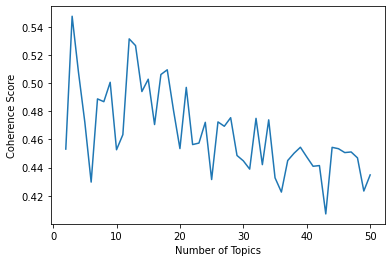

In [53]:
x = range(2,51)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()

__(2) 언어 모델 평가방법 (PPL: Perplexity)__

확률 모델이 결과를 얼마나 정확하게 예측하는지 나타내는 값.
동일 모델 내 파라미터에 따른 성능 평가할 때 사용.
선정된 토픽 개수마다 학습시켜 가장 낮은 값을 보이는 구간을 찾아 최적화된 토픽의 개수 선정. 
수치가 낮을수록 높은 정확도.
Coherence Score와 함께 고려해야함.

<span style="color:red">train, test set 나누기</span>

- 8:2로 나누는 게 좋다고 함. 
- 80%로 학습한 lda model을 20%의 테스트셋에 적용시켜 수치를 보고, 가장 좋은 토픽의 개수를 찾아 전체 데이터셋에 토픽모델링 적용

In [54]:
len(corpus)

2871

In [55]:
corpus_train = corpus[:1080]
corpus_test = corpus[1080:]

In [17]:
perplexity_values=[]

for i in range(2,100) : 
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

KeyboardInterrupt: 

In [ ]:
x = range(2,100)
plt.plot(x, perplexity_values)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.show()

In [ ]:
# 토픽 개수, 키워드 개수를 정해주는 변수를 추가.
NUM_TOPICS = 13

NUM_TOPIC_WORDS = 10

def print_topic_words(model):

    # 토픽 모델링 결과를 출력해 주는 함수.
    print("\nPrinting topic words.\n")
    
    for topic_id in range(model.num_topics):
        topic_word_probs = model.show_topic(topic_id, NUM_TOPIC_WORDS)
        print("Topic ID: {}".format(topic_id))
        
        for topic_word, prob in topic_word_probs:
            print("\t{}\t{}".format(topic_word, prob))
            
        print("\n")

# LDA를 실행.
model = models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, alpha="auto", eta="auto")

word_dict = {};

for i in range(NUM_TOPICS):

    words = model.show_topic(i)

    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]

pd.DataFrame(word_dict)

In [ ]:
# pyLDAvis 불러오기
import pyLDAvis
import pyLDAvis.gensim

# pyLDAvis를 jupyter notebook에서 실행할 수 있게 활성화.
pyLDAvis.enable_notebook()

# pyLDAvis 실행.
data = pyLDAvis.gensim.prepare(model, corpus, dictionary)
data